In [51]:
import pandas as pd
import csv
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import datetime
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer

In [52]:
dir='/boxscore_data'         # Replace with path to your directory: absolute or relative
pattern = 'nfl' # Replace with your target substring
matching_files = [f for f in os.listdir(dir) if pattern in f]

In [53]:
all_data = pd.DataFrame()
for data_file in matching_files:
  df = pd.read_csv(data_file)
  all_data = pd.concat([all_data, df])
all_data = all_data.rename(columns={'Unnamed: 0':'game_id'})

In [75]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7946 entries, 0 to 271
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       7946 non-null   object 
 1   Week-Year                     7946 non-null   object 
 2   attendance                    7348 non-null   float64
 3   away_first_downs              7946 non-null   int64  
 4   away_fourth_down_attempts     7722 non-null   float64
 5   away_fourth_down_conversions  7722 non-null   float64
 6   away_fumbles                  7946 non-null   int64  
 7   away_fumbles_lost             7946 non-null   int64  
 8   away_interceptions            7946 non-null   int64  
 9   away_net_pass_yards           7946 non-null   int64  
 10  away_pass_attempts            7946 non-null   int64  
 11  away_pass_completions         7946 non-null   int64  
 12  away_pass_touchdowns          7946 non-null   int64  
 13  away

In [55]:
kmeans_data = all_data.copy(deep=True)

In [56]:
drop_cols = [1,2, 27, 28, 29, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
kmeans_data.drop(kmeans_data.columns[drop_cols], axis=1 ,inplace=True)
kmeans_data = kmeans_data.dropna()
kmeans_data["home_time_of_possession"] = kmeans_data.home_time_of_possession.map(lambda a: int(datetime.timedelta(minutes=int(a.split(':')[0]),seconds=int(a.split(':')[1])).total_seconds())/60.0 )
kmeans_data["away_time_of_possession"] = kmeans_data.away_time_of_possession.map(lambda a: int(datetime.timedelta(minutes=int(a.split(':')[0]),seconds=int(a.split(':')[1])).total_seconds())/60.0 )
scaler = MinMaxScaler()
kmeans_data.iloc[:, 1:] = scaler.fit_transform(kmeans_data.iloc[:, 1:])

In [76]:
kmeans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7722 entries, 224 to 271
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       7722 non-null   object 
 1   away_first_downs              7722 non-null   float64
 2   away_fourth_down_attempts     7722 non-null   float64
 3   away_fourth_down_conversions  7722 non-null   float64
 4   away_fumbles                  7722 non-null   float64
 5   away_fumbles_lost             7722 non-null   float64
 6   away_interceptions            7722 non-null   float64
 7   away_net_pass_yards           7722 non-null   float64
 8   away_pass_attempts            7722 non-null   float64
 9   away_pass_completions         7722 non-null   float64
 10  away_pass_touchdowns          7722 non-null   float64
 11  away_pass_yards               7722 non-null   float64
 12  away_penalties                7722 non-null   float64
 13  aw

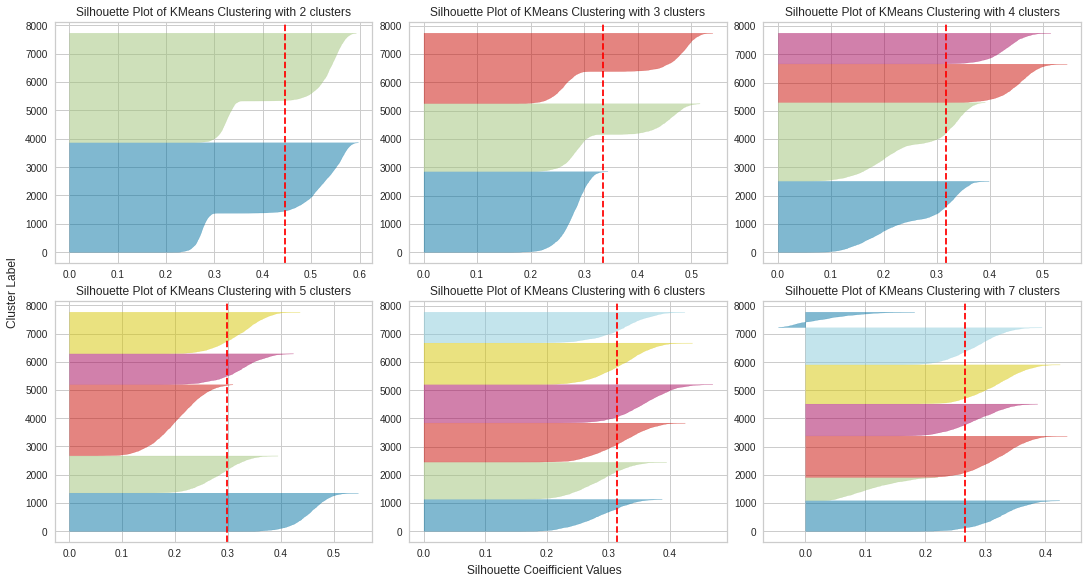

In [86]:
fig, ax = plt.subplots(2, 3, figsize=(15,8), constrained_layout=True)
fig.supxlabel('Silhouette Coeifficient Values')
fig.supylabel('Cluster Label')
count = 0
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i, max_iter=50)

    q, mod = divmod(count, 3)
    count += 1
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    ax[q][mod].set_title('Silhouette Plot of KMeans Clustering with '+str(i)+' clusters')
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(kmeans_data.iloc[:, 1:])

In [84]:
def compute_silhouette_score(input_df, min_k, max_k, k_max_iter):
    # silhouette analysis
    k_range = range(min_k, max_k+1)
    scores = []
    for k in k_range :
        # intialise kmeans
        kmeans = KMeans(n_clusters=k, max_iter=k_max_iter)
        kmeans.fit(input_df)
        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg = silhouette_score(input_df, cluster_labels)
        print(f"For k={k}, silhouette score = {silhouette_avg}")
        scores.append(silhouette_avg)
    plt.plot(k_range, scores, 'ob-')
    plt.xlabel('Num Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Plot')
    plt.show()

For k=2, silhouette score = 0.4450160828424519
For k=3, silhouette score = 0.3349385140277338
For k=4, silhouette score = 0.3182028240161899
For k=5, silhouette score = 0.29872009662720117
For k=6, silhouette score = 0.3143585271786973
For k=7, silhouette score = 0.26544606173198737
For k=8, silhouette score = 0.2155728091997812
For k=9, silhouette score = 0.17915623522232837
For k=10, silhouette score = 0.14236775228582846
For k=11, silhouette score = 0.10055076668431934
For k=12, silhouette score = 0.09499654470216687
For k=13, silhouette score = 0.06488618796705908
For k=14, silhouette score = 0.06685210242781989
For k=15, silhouette score = 0.06374836837366252


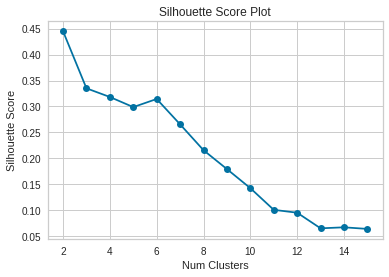

In [85]:
compute_silhouette_score(kmeans_data.iloc[:, 1:], 2,15,50)

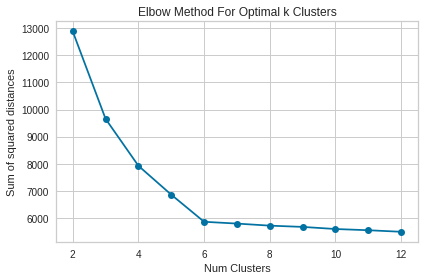

In [83]:
def elbow_plot(min_k, max_k, k_max_iter):
    # Elbow-curve/sum of squared distances
    sum_squared_distances = []
    k_range = range(min_k, max_k+1)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, max_iter=k_max_iter)
        kmeans.fit(kmeans_data.iloc[:, 1:])
        sum_squared_distances.append(kmeans.inertia_)

    # Plot the score for each value of k
    fig = plt.figure()
    plt.plot(k_range, sum_squared_distances, 'ob-')
    plt.xlabel('Num Clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k Clusters')
    plt.tight_layout()
    fig.savefig('elbow_plot.png')
    plt.show()
    
    
elbow_plot(2,12, 50)

In [80]:
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(kmeans_data.iloc[:, 1:])
kmeans_data.loc[:,'labels'] = kmeans.labels_

In [ ]:
diff = kmeans_data[kmeans_data.labels == 4].iloc[:, 1:49].values - kmeans_data[kmeans_data.game_id == '199109010cle'].iloc[:, 1:49].values

In [ ]:
def find_closest_game(full_data, kmeans_result, input_game, num_games=5, full=True):
  cluster = kmeans_result[kmeans_result.game_id == input_game].labels.tolist()[0]
  diff = kmeans_result[kmeans_result.labels == cluster].iloc[:, 1:49].values - kmeans_result[kmeans_result.game_id == input_game].iloc[:, 1:49].values
  dists = []
  for d in diff:
    dists.append(np.linalg.norm(d))
  same_cluster = kmeans_result[kmeans_result.labels == cluster]
  same_cluster.loc[:,'distances'] = dists
  same_cluster.sort_values(by='distances')
  closest = same_cluster.game_id.tolist()[1:(num_games+1)]
  similar_games = full_data[full_data.game_id.isin(closest)]
  if full:
    return similar_games
  else:
    small_games = [similar_games['game_id'].values, similar_games["Week-Year"].values, similar_games['winning_name'].values, similar_games['losing_name'].values, 
                   similar_games['winning_abbr'].values, similar_games['losing_abbr'].values]
    small_games_reformat = []
    for i in range(len(small_games[0])):
      small_games_reformat.append([small_games[x][i] for x in range(len(small_games))])
    return small_games_reformat

In [ ]:
find_closest_game(all_data, kmeans_data, "199109010cle", full=False)

In [ ]:
all_data.to_pickle('all_data.pkl')

In [67]:
kmeans_data.to_pickle('kmeans_data.pkl')

In [68]:
all_data.to_csv('all_data.csv', index=False)
kmeans_data.to_csv('kmeans_data.csv', index=False)

In [70]:
all_data['game_id'].str[-3:]

0      chi
1      det
2      gnb
3      kan
4      was
      ... 
267    rav
268    tam
269    crd
270    ram
271    rai
Name: game_id, Length: 7946, dtype: object

In [71]:
simple_game_list = []
for entry in all_data.values:
  game_id = entry[0]
  if game_id in kmeans_data.game_id.values:
    week_year = entry[1]
    home_team_abbr = entry[0][-3:]
    winning_abbr = entry[64]
    losing_abbr = entry[54]
    winning_name = entry[65]
    losing_name = entry[55]
    if home_team_abbr.lower() == winning_abbr.lower():
      home_name = winning_name
      away_name = losing_name
    else:
      home_name = losing_name
      away_name = winning_name
    simple_game_list.append([game_id, week_year, home_name, away_name])

In [72]:
print(len(simple_game_list))

7722


In [73]:
simple_game_list[:5]

[['199109010cle', '1-1991', 'Cleveland Browns', 'Dallas Cowboys'],
 ['199109010gnb', '1-1991', 'Green Bay Packers', 'Philadelphia Eagles'],
 ['199109010kan', '1-1991', 'Kansas City Chiefs', 'Atlanta Falcons'],
 ['199109010nor', '1-1991', 'New Orleans Saints', 'Seattle Seahawks'],
 ['199109010nyj', '1-1991', 'New York Jets', 'Tampa Bay Buccaneers']]

In [74]:
df = pd.DataFrame(simple_game_list, columns = ['game_id', 'Week-Year', 'home_team', 'away_team'])
df.to_pickle("basic_game_info.pkl")
df.to_csv("basic_game_info.csv", index=False)